<a href="https://colab.research.google.com/github/YeisonCardona/AnaliticaDatos/blob/master/M%C3%A1xima_Verosimilitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Máxima Verosimilitud

La estimación por máxima verosimilitud (**MLE**) es un método habitual para ajustar un modelo y estimar sus parámetros.

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sn

## Distribución Normal

$$
\mathcal{N}(x_{i},\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(\frac{-\left|x_{i}-\mu\right|^{2}}{2\sigma^{2}}\right)
$$



Primero es necesario definir una función que nos retorne la función de densidad de probabilidad (**PDF**) de una distribución normal para un determinado valor de $\mu$ y $\sigma$.

In [0]:
def normal(Xi, mean, sigma):
    return (1 /np.sqrt(2*np.pi*sigma**2)) * np.exp((-(np.abs(Xi - mean))**2)/(2*sigma**2))

Entonces podemos visualizar éstas desidades simplemente con: 

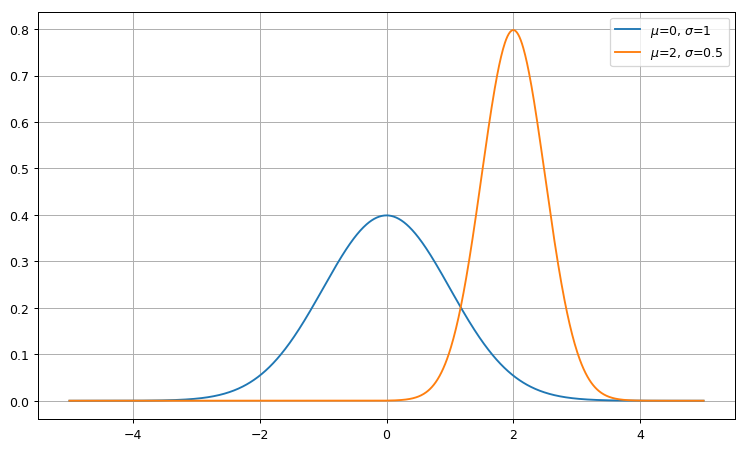

In [0]:
plt.figure(figsize=(10, 6), dpi=90)

X =  np.linspace(-5, 5, 1000)
plt.plot(X, normal(X, 0, 1), label=f"$\mu$={0}, $\sigma$=1")

X =  np.linspace(-5, 5, 1000)
plt.plot(X, normal(X, 2, 0.5), label=f"$\mu$={2}, $\sigma$=0.5")

plt.grid()
plt.legend()
plt.show()

Igualmente podemos generar datos aleatorios que sigan una determinada distribución y graficar sus distribuciones.

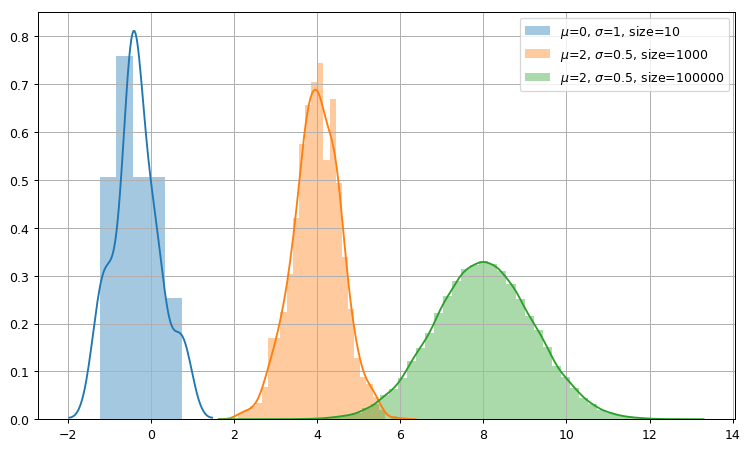

In [0]:
plt.figure(figsize=(10, 6), dpi=90)

data = np.random.normal(0, 1, size=10)
sn.distplot(data, label=f"$\mu$={0}, $\sigma$=1, size=10")

data = np.random.normal(4, 0.6, size=1000)
sn.distplot(data, label=f"$\mu$={2}, $\sigma$=0.5, size=1000")

data = np.random.normal(8, 1.2, size=100000)
sn.distplot(data, label=f"$\mu$={2}, $\sigma$=0.5, size=100000")

plt.grid()
plt.legend()
plt.show()

Como se puede ver en el gráfico anterior entre más datos se usen más se acerca al modelo de una distribución normal. 

## Máxima verosimilitud




In [0]:
def maximum_likelihood(data, mean, sigma):
    k = 6
    def wrapper(mean, sigma):
        return np.prod([(k * d * normal(d, mean, abs(sigma))) for d in data])
    wrapper = np.vectorize(wrapper)

    return wrapper(mean, sigma)

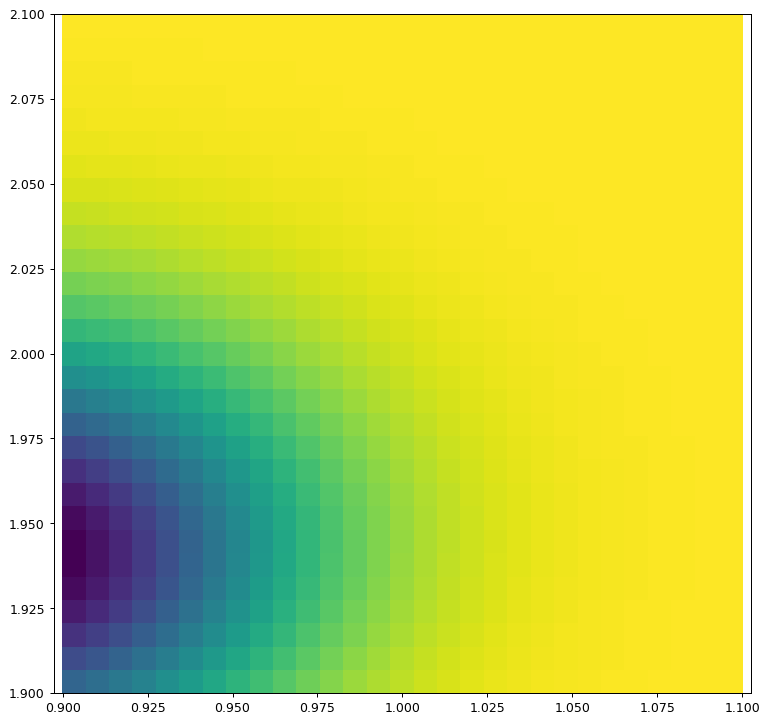

In [0]:
u = 1
sigma = 2
delta = 0.1

delta_range = np.linspace(u-delta, u+delta, 30)
sigma_range = np.linspace(sigma-delta, sigma+delta, 30)

data = np.random.normal(u, sigma, size=1000)

delta_mat, sigma_mat = np.meshgrid(delta_range, sigma_range)
likelihood = maximum_likelihood(data, delta_mat, sigma_mat)

plt.figure(figsize=(10, 10), dpi=90)
h = plt.pcolor(delta_mat, sigma_mat, likelihood)
plt.axis('equal')
plt.show()